In [146]:
from ssapp.data.single_parameter_loaders import SingleParameterVarianceDataset
from torch.utils.data.dataloader import DataLoader
from ssapp.Utils import FigureSaver

%matplotlib inline
%config InlineBackend.figure_formats = ['png']
%load_ext autoreload
%autoreload 2


dataset = SingleParameterVarianceDataset('Single Reflector','diameter',num_params=3,cuts = 100)

dataloader = DataLoader(dataset,batch_size= len(dataset))

figsaver = FigureSaver(subfolder='SingleFarFieldPointPlots',default_format='png',dpi=600)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
# Single Reflector Case




In [148]:
import matplotlib.pyplot as plt

def plotSingleParameterSweep(antenna_name, 
                            parameter_name,
                            param_num, 
                            num_params,
                            point_index = (180,0),
                            title = None):
    
    
    
    dataset = SingleParameterVarianceDataset(antenna_name,
                                            parameter_name,
                                            num_params=num_params,
                                            cuts = 100,)
    dataloader = DataLoader(dataset,batch_size= len(dataset))

    params,fields = next(iter(dataloader))

    param_name_map = {
        'Patch Antenna':{
            'coax_x': 'Coax. X Pos.',
            'coax_y': 'Coax. Y Pos.',
            'permittivity':'Permittivity'
        },
        'Horn':{
            'eps_r':'Relative Permittivity',
            'loss_t':'Loss Tangent'
        },
        'Single Reflector':{
            'diameter': 'Diameter',
            'f_over_D' : 'Focal Length',
            'offset_over_D': 'Offset'
        }
    }

    dataset_to_antenna_map = {
        'Horn': 'CHA',
        'Patch Antenna': 'PATCH',
        'Single Reflector': 'RFCLT'
    }

    if type(title) is type(None):
        title = dataset_to_antenna_map[antenna_name]+r' Single Point '+param_name_map[antenna_name][parameter_name]+r' Sweep at $\theta=0,\phi=0$'

    

    ylabels = ['$\operatorname{Re}(E_{co})$','$\operatorname{Im}(E_{co})$',
                '$\operatorname{Re}(E_{cross})$','$\operatorname{Im}(E_{cross})$']
    
    fig,axs = plt.subplots(ncols=2,nrows = 2,figsize=(9,3.6),constrained_layout=True)
    
    for i,ax in enumerate(axs.flatten()):
        
        fig.suptitle(title)
        plot_point = fields[:,point_index[0],point_index[1],i]
        ax.plot(params[:,param_num],plot_point)
        ax.set_xlabel(param_name_map[antenna_name][parameter_name])
        ax.set_ylabel(ylabels[i])
        ax.grid(True)
        ax.set_xlim([min(params[:,param_num]),max(params[:,param_num])])
        
    




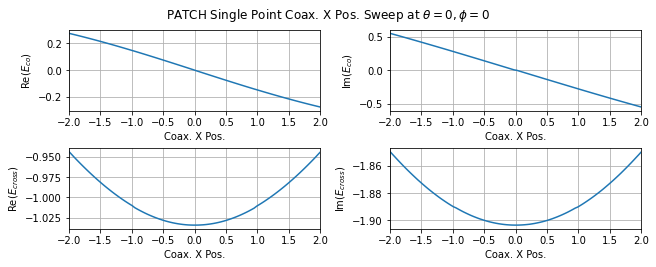

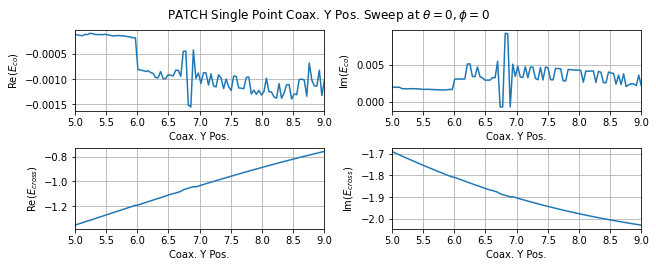

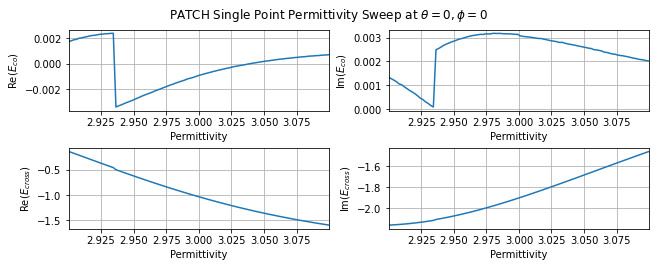

In [149]:
plotSingleParameterSweep('Patch Antenna',
                        'coax_x',
                        0,
                        3,
                        point_index = (180,0))

figsaver('PatchAntennaSinglePointCoax_x')

plotSingleParameterSweep('Patch Antenna','coax_y',1,3,point_index = (180,0))

figsaver('PatchAntennaSinglePointCoax_y')

plotSingleParameterSweep('Patch Antenna','permittivity',2,3,point_index = (180,0))

figsaver('PatchAntennaSinglePointPermittivity')

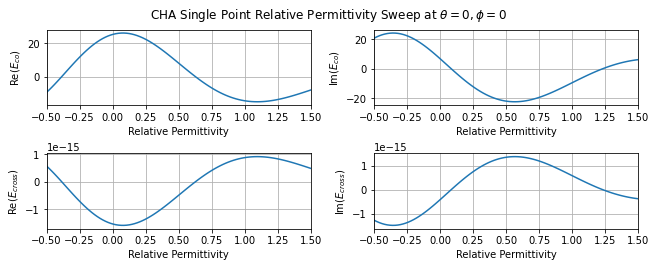

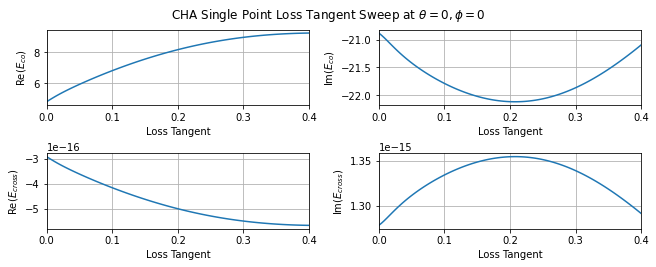

In [150]:
plotSingleParameterSweep('Horn',
                        'eps_r',
                        0,
                        2,
                        point_index = (180,0))

figsaver('HornAntennaSinglePointEps_r')

plotSingleParameterSweep('Horn',
                        'loss_t',
                        1,
                        2,
                        point_index = (180,0))

figsaver('HornAntennaSinglePointLoss_t')


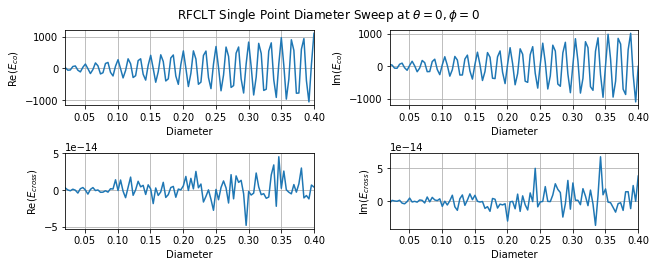

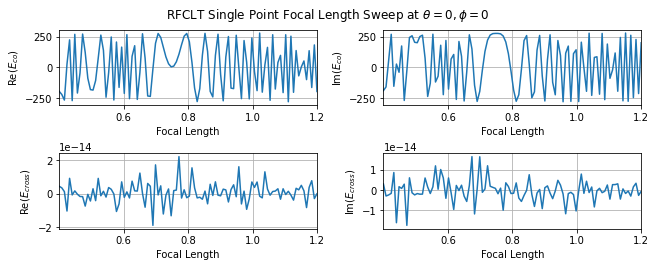

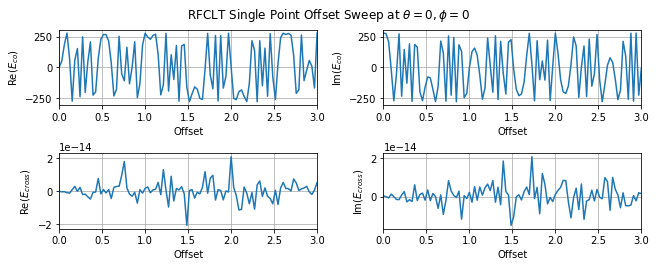

In [151]:
plotSingleParameterSweep('Single Reflector',
                        'diameter',
                        1,
                        3,
                        point_index = (180,0))

figsaver('RFLCTSinglePointDiameter')

plotSingleParameterSweep('Single Reflector',
                        'f_over_D',
                        0,
                        3,
                        point_index = (180,0))

figsaver('RFLCTSinglePointFocalLength')

plotSingleParameterSweep('Single Reflector',
                        'offset_over_D',
                        2,
                        3,
                        point_index = (180,0))

figsaver('RFLCTSinglePointOffset')